# **1. Import Library**

In [1]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7b314e5cf7cd52bfe01322094f2c346a45047275d723e22b4dbea40b80ed2695
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into acco

In [2]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [3]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [5]:
#import library
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, jaccard_score
from sklearn.metrics import roc_curve, roc_auc_score

# Plotting
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Load dataset**

In [6]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Employee.csv')

In [7]:
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# **3. EDA**

## **3.1 Checking datatype, missing value, basic visualization**

In [8]:
# Check data dimension
df.shape

(4653, 9)

In [9]:
# Check datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


**Process columns with wrong data type:**

---


* 'Education',
* 'City',
* 'Gender',
* 'EverBenched'

In [10]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [11]:
# Check null value of columns
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [12]:
# Check duplicate
df.duplicated().sum()

1889

In [13]:
# Drop duplicate
df.drop_duplicates(inplace = True)
df = df.reset_index(drop=True)
df.index += 1

In [14]:
# Data shape after remove duplicated values
df.shape

(2764, 9)

In [15]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1
5,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
2760,Masters,2017,Pune,2,31,Female,No,2,0
2761,Bachelors,2016,Pune,3,30,Male,No,2,0
2762,Masters,2013,Pune,2,37,Male,No,2,1
2763,Masters,2018,New Delhi,3,27,Male,No,5,1


In [16]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## **3.2 Profile**

In [17]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

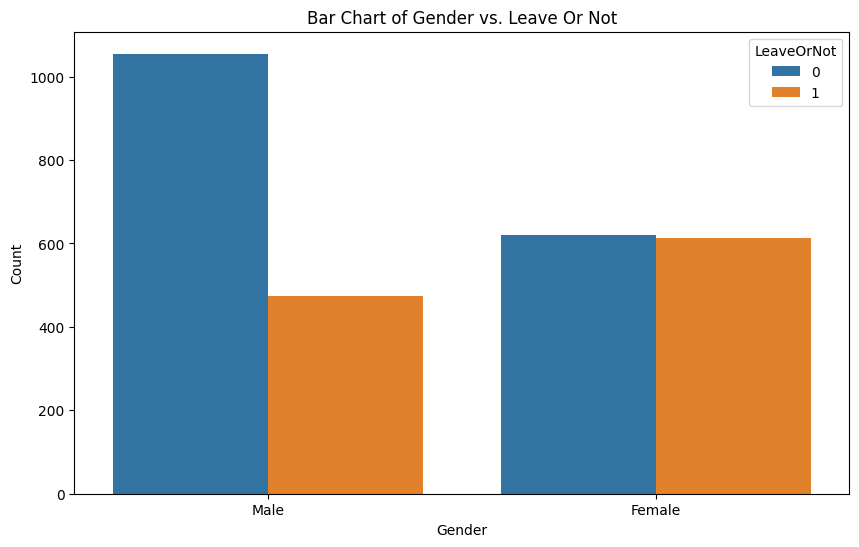

In [18]:
plt.figure(figsize=(10, 6))

# Create a countplot using seaborn
sns.countplot(data=df, x='Gender', hue='LeaveOrNot')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart of Gender vs. Leave Or Not')
plt.show()

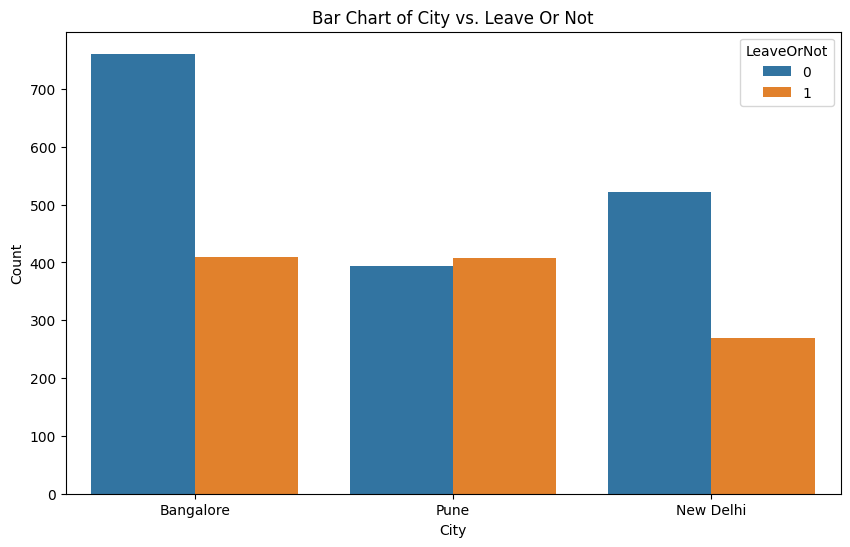

In [19]:
plt.figure(figsize=(10, 6))

# Create a countplot using seaborn
sns.countplot(data=df, x='City', hue='LeaveOrNot')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Bar Chart of City vs. Leave Or Not')

plt.show()

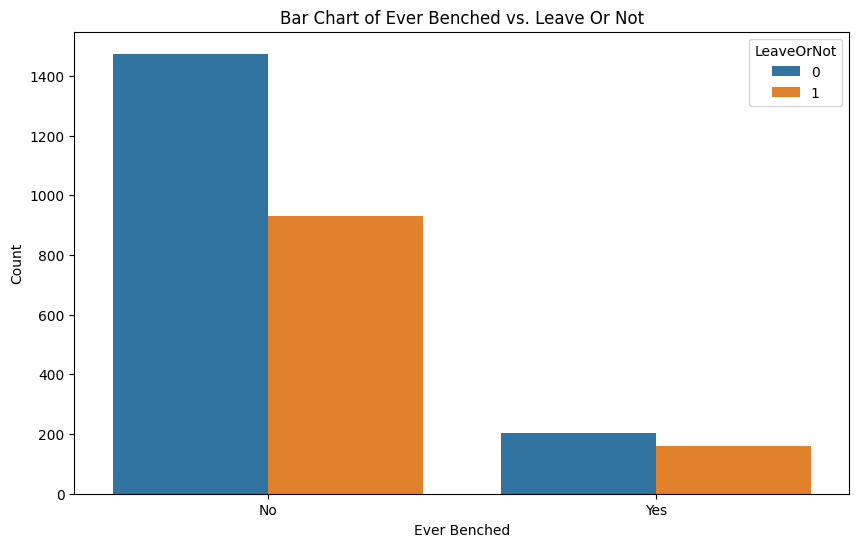

In [20]:
plt.figure(figsize=(10, 6))

# Create a countplot using seaborn
sns.countplot(data=df, x='EverBenched', hue='LeaveOrNot')

plt.xlabel('Ever Benched')
plt.ylabel('Count')
plt.title('Bar Chart of Ever Benched vs. Leave Or Not')

plt.show()

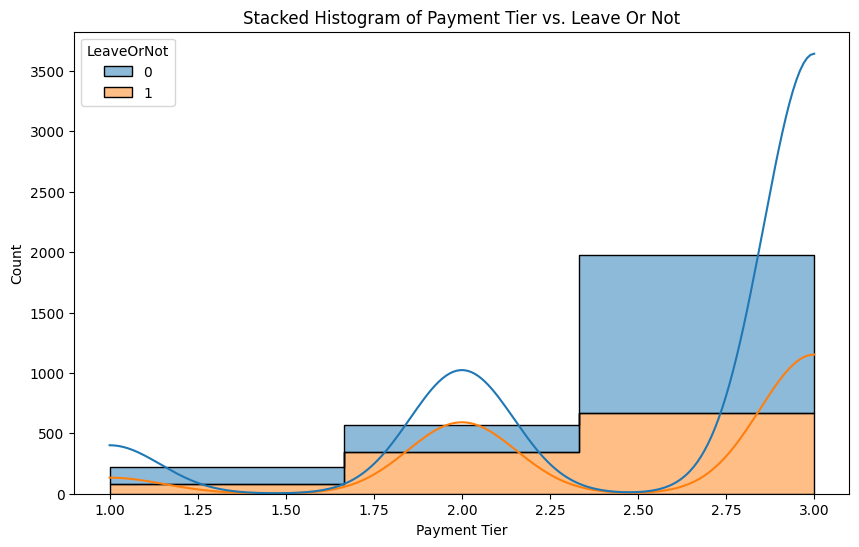

In [21]:
plt.figure(figsize=(10, 6))

# Create a stacked histogram using seaborn
sns.histplot(data=df, x='PaymentTier', hue='LeaveOrNot', multiple='stack', element='step', bins= 3, kde=True)

plt.xlabel('Payment Tier')
plt.ylabel('Count')
plt.title('Stacked Histogram of Payment Tier vs. Leave Or Not')
plt.show()

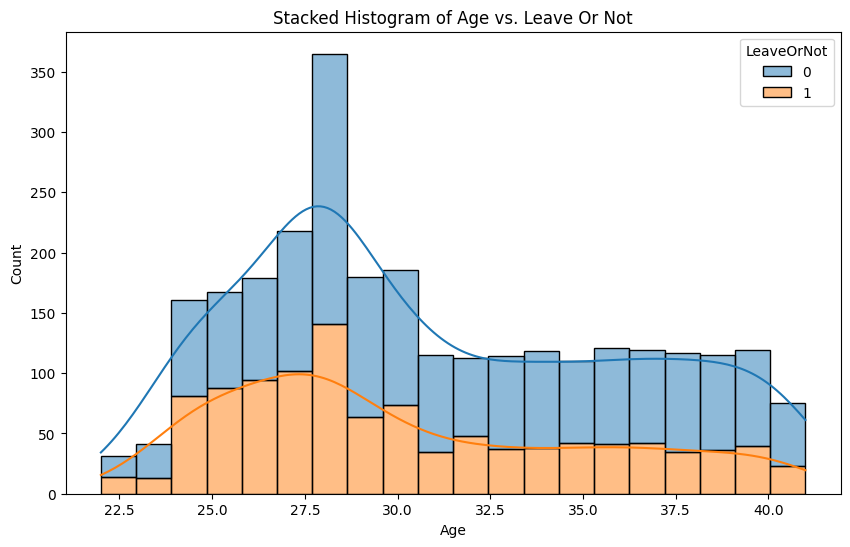

In [22]:
plt.figure(figsize=(10, 6))

# Create a countplot using seaborn
sns.histplot(data=df, x='Age', hue='LeaveOrNot', kde =True, bins = 20, multiple = 'stack')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Histogram of Age vs. Leave Or Not')
plt.show()

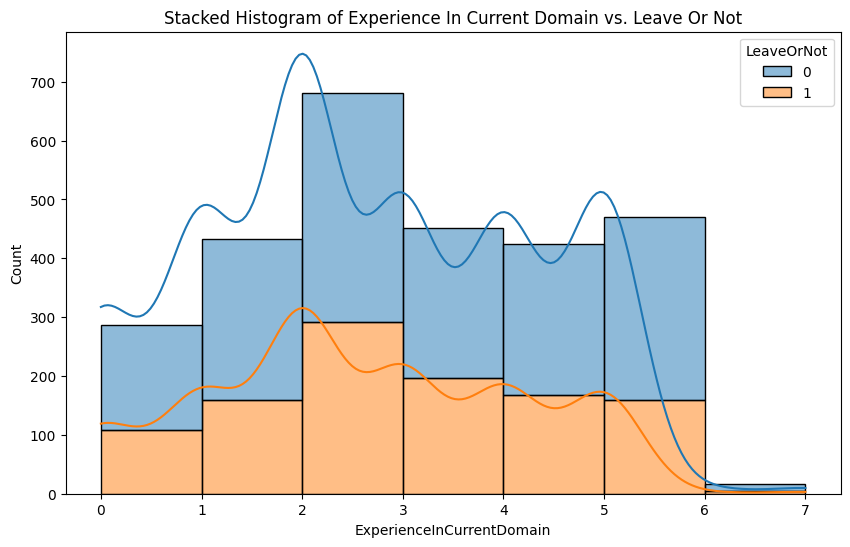

In [23]:
plt.figure(figsize=(10, 6))

# Create a countplot using seaborn
sns.histplot(data=df, x='ExperienceInCurrentDomain', hue='LeaveOrNot', kde =True, bins = 7, multiple = 'stack')

plt.xlabel('ExperienceInCurrentDomain')
plt.ylabel('Count')
plt.title('Stacked Histogram of Experience In Current Domain vs. Leave Or Not')

plt.show()

# **4. Data Processing**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 1 to 2764
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 194.5+ KB


In [25]:
# Check unique values of columns with wrong data type
columns_to_check = ['Education', 'City', 'Gender', 'EverBenched']
unique_values = {column: df[column].unique() for column in columns_to_check}
for column, values in unique_values.items():
    print(f'Unique values in {column}: {values}')

Unique values in Education: ['Bachelors' 'Masters' 'PHD']
Unique values in City: ['Bangalore' 'Pune' 'New Delhi']
Unique values in Gender: ['Male' 'Female']
Unique values in EverBenched: ['No' 'Yes']


In [26]:
# Label encoding
df['Education'].replace({'Bachelors': 0, 'Masters': 1, 'PHD': 2}, inplace = True)
df['City'].replace({'Bangalore': 0, 'New Delhi': 1, 'Pune': 2}, inplace = True)
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
df['EverBenched'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [27]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,0,2017,0,3,34,1,0,0,0
2,0,2013,2,1,28,0,0,3,1
3,0,2014,1,3,38,0,0,2,0
4,1,2016,0,3,27,1,0,5,1
5,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
2760,1,2017,2,2,31,0,0,2,0
2761,0,2016,2,3,30,1,0,2,0
2762,1,2013,2,2,37,1,0,2,1
2763,1,2018,1,3,27,1,0,5,1


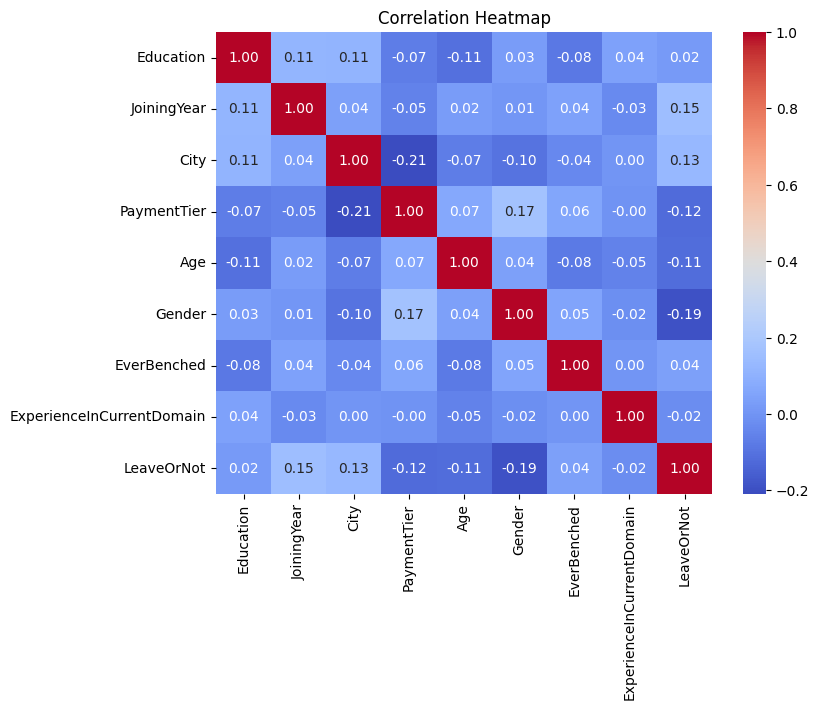

In [28]:
df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Defind feature sets, X:
X = df[['JoiningYear','City','PaymentTier','Age','Gender']]
X

,JoiningYear,City,PaymentTier,Age,Gender
1,2017,0,3,34,1
2,2013,2,1,28,0
3,2014,1,3,38,0
4,2016,0,3,27,1
5,2017,2,3,24,1
...,...,...,...,...,...
2760,2017,2,2,31,0
2761,2016,2,3,30,1
2762,2013,2,2,37,1
2763,2018,1,3,27,1


In [36]:
# Define label, Y
y = df['LeaveOrNot'].values
y

array([0, 1, 0, ..., 1, 1, 0])

In [37]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [38]:
# Create a SMOTE object
sm = SMOTE(sampling_strategy="minority", random_state=42)

# Fit and transform the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_test_smote, y_test_smote= sm.fit_resample(X_test, y_test)

In [39]:
X_train_smote.shape, y_train_smote.shape

((2686, 5), (2686,))

In [40]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.fit_transform(X_test_smote)

# **5. Classification**

In [41]:
# Function for evaluate model

def evaluate_model(model, X_test_scaled, y_test_smote):
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_smote, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Generate and print the classification report
    class_report = classification_report(y_test_smote, y_pred)
    print("Classification Report:\n", class_report)

    # Generate and print the confusion matrix
    conf_matrix = confusion_matrix(y_test_smote, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate ROC curve and AUC score
    if len(set(y_test_smote)) == 2:
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test_smote, y_probs)
        auc = roc_auc_score(y_test_smote, y_probs)

        print(f"AUC (Area Under the Curve): {auc:.2f}")

        # Plot the ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()


### **5.1 GridSearchCV**

In [42]:
# Define models and hyperparameter grids
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear"],
            'max_iter': [100, 200, 500, 1000, 2000, 5000],
            'fit_intercept': [True, False]
        },
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [ 0.1, 1, 10],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            'degree': [2]
        },
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20, 30],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': [2, 3, 4],
            'min_samples_leaf': [1, 2, 4],
        },
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 5, 10, 15],
            "max_features": ["sqrt", "log2"],
        },
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "p": [1, 2],
            "weights": ['uniform', 'distance']
        },
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.2, 0.5],
            'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.1, 0.2, 0.5],
            'max_depth': [3, 4, 5],
        },
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(),
        "params": {
             'learning_rate': [0.1, 0.2, 0.5],
             'max_depth': [3, 4, 5],
             'n_estimators': [100, 200, 300],
        },
    },
    "LightGBM": {
        "model": lgb.LGBMClassifier(force_col_wise=True, verbose = -1),
        "params": {
             'learning_rate': [0.1, 0.2, 0.5],
             'n_estimators': [100, 200, 300],
             'max_depth': [3, 4, 5]
        },
    },
    "CatBoost": {
        "model": cb.CatBoostClassifier(verbose=False),
        "params": {
            'iterations': [100, 200, 300],
            'learning_rate': [0.1, 0.2, 0.5],
            'depth': [4, 6, 8],
        },
    },
}

# Perform grid search for each model
for model_name, model_info in models.items():
    model = model_info["model"]
    param_grid = model_info["params"]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy",verbose = 0)
    grid_search.fit(X_train_scaled, y_train_smote)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best parameters for SVC: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best parameters for XGBoost: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}
Best parameters for LightGBM: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best parameters for CatBoost: {'depth': 4, 'iterations': 300, 'learning_rate': 0.2}


### **5.2 Logistic Regression**

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       333
           1       0.65      0.65      0.65       333

    accuracy                           0.65       666
   macro avg       0.65      0.65      0.65       666
weighted avg       0.65      0.65      0.65       666

Confusion Matrix:
 [[217 116]
 [116 217]]
AUC (Area Under the Curve): 0.71


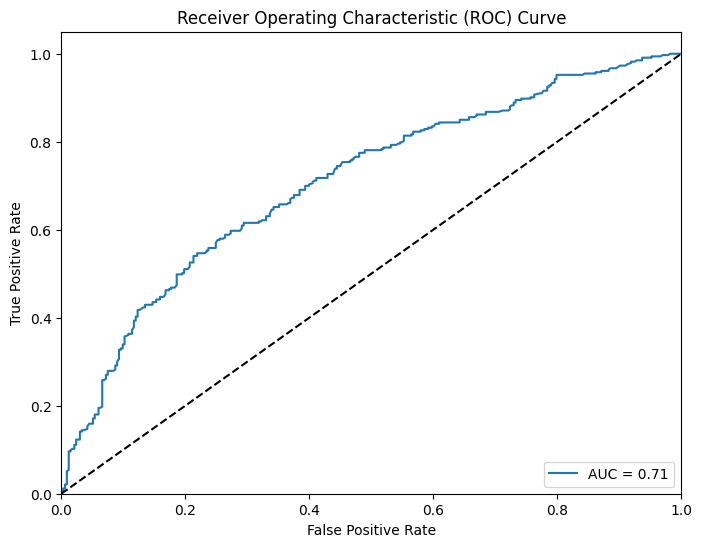

In [43]:
# Create the model with specified parameters
logistic_model = LogisticRegression(C=0.1, fit_intercept=False, max_iter=100, penalty='l2', solver='liblinear')

# Fit the model to your training data
logistic_model.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(logistic_model, X_test_scaled, y_test_smote)


### **5.3 SVC**

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       333
           1       0.86      0.61      0.71       333

    accuracy                           0.76       666
   macro avg       0.78      0.76      0.75       666
weighted avg       0.78      0.76      0.75       666

Confusion Matrix:
 [[301  32]
 [130 203]]
AUC (Area Under the Curve): 0.80


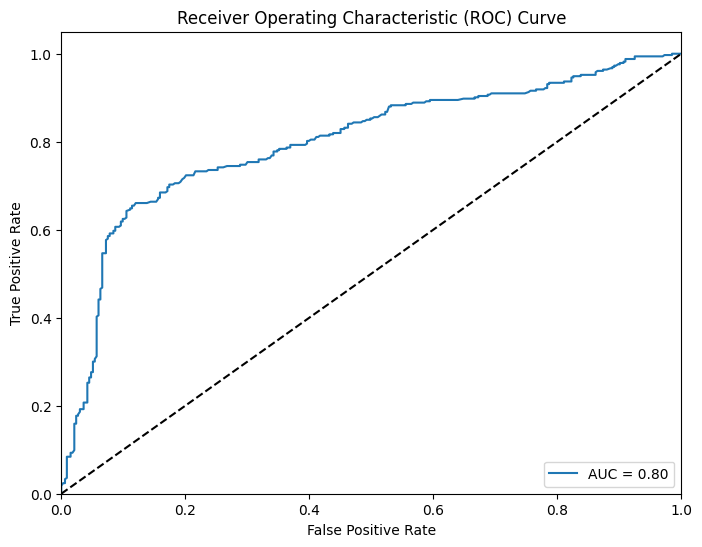

In [44]:
# Create the model with specified parameters
svc_classifier = SVC(C=1, degree = 2, kernel='rbf', probability= True)

# Fit the model to your training data
svc_classifier.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(svc_classifier, X_test_scaled, y_test_smote)

### **5.4 Decision Tree Classifier**

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71       333
           1       0.73      0.57      0.64       333

    accuracy                           0.68       666
   macro avg       0.69      0.68      0.68       666
weighted avg       0.69      0.68      0.68       666

Confusion Matrix:
 [[264  69]
 [142 191]]
AUC (Area Under the Curve): 0.71


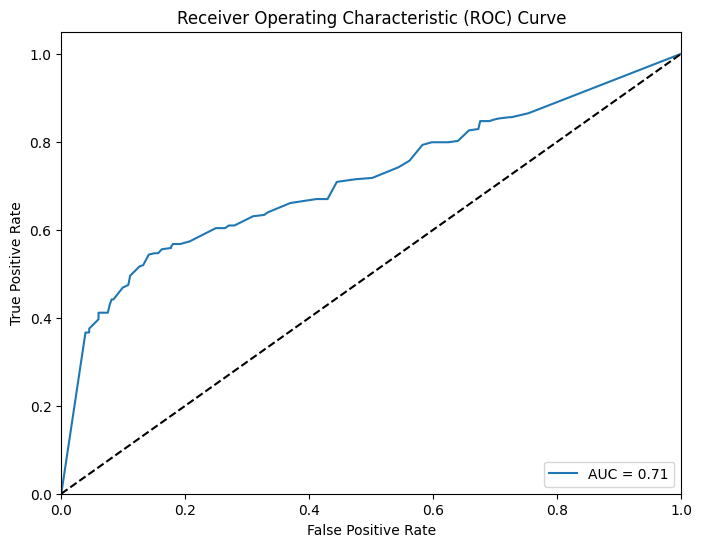

In [45]:
# Create the model with specified parameters
DT = DecisionTreeClassifier(max_depth=10, criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 4)

# Fit the model to your training data
DT.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(DT, X_test_scaled, y_test_smote)

### **5.5 Random Forest Classifier**

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       333
           1       0.72      0.59      0.65       333

    accuracy                           0.68       666
   macro avg       0.69      0.68      0.68       666
weighted avg       0.69      0.68      0.68       666

Confusion Matrix:
 [[259  74]
 [138 195]]
AUC (Area Under the Curve): 0.75


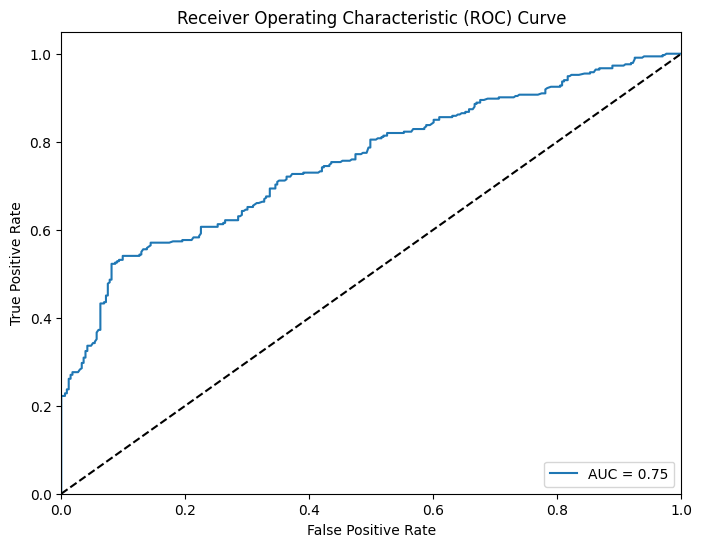

In [46]:
# Create the model with specified parameters
RF= RandomForestClassifier(max_depth= 10, max_features='sqrt', n_estimators= 300)

# Fit the model to your training data
RF.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(RF, X_test_scaled, y_test_smote)

### **5.6 KNN Classifier**

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       333
           1       0.72      0.62      0.67       333

    accuracy                           0.69       666
   macro avg       0.69      0.69      0.69       666
weighted avg       0.69      0.69      0.69       666

Confusion Matrix:
 [[254  79]
 [127 206]]
AUC (Area Under the Curve): 0.72


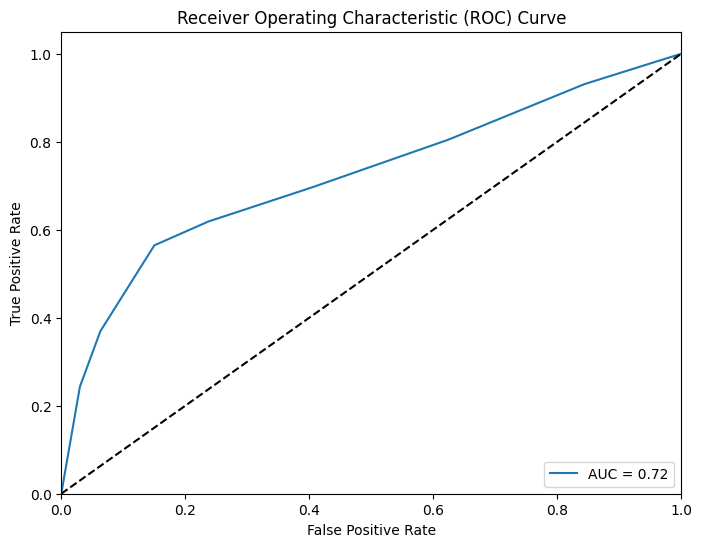

In [47]:
# Create the model with specified parameters
knn_classifier = KNeighborsClassifier(n_neighbors=7, p = 1, weights = 'uniform')

# Fit the model to your training data
knn_classifier.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(knn_classifier, X_test_scaled, y_test_smote)

### **5.7 Adaboost Classifier**

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79       333
           1       0.85      0.64      0.73       333

    accuracy                           0.76       666
   macro avg       0.78      0.76      0.76       666
weighted avg       0.78      0.76      0.76       666

Confusion Matrix:
 [[294  39]
 [120 213]]
AUC (Area Under the Curve): 0.82


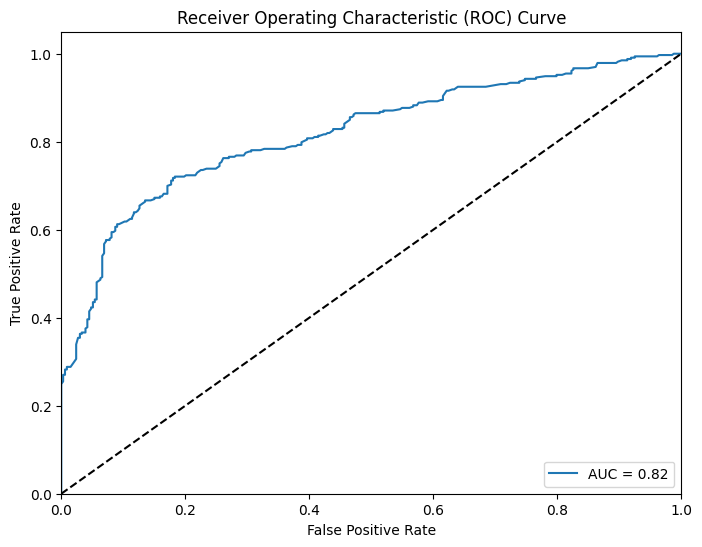

In [48]:
# Create the model with specified parameters
ada = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=2), learning_rate= 0.1, n_estimators= 100)

# Fit the model to your training data
ada.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(ada, X_test_scaled, y_test_smote)

### **5.8 Gradient Boosting**

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.75       333
           1       0.78      0.62      0.69       333

    accuracy                           0.72       666
   macro avg       0.73      0.72      0.72       666
weighted avg       0.73      0.72      0.72       666

Confusion Matrix:
 [[274  59]
 [127 206]]
AUC (Area Under the Curve): 0.79


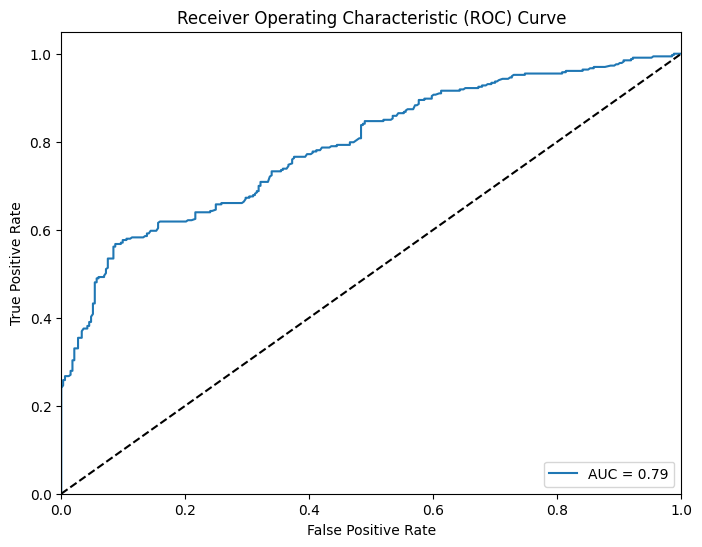

In [49]:
# Create the model with specified parameters
grb = GradientBoostingClassifier(learning_rate = 0.2, max_depth= 3, n_estimators= 300)

# Fit the model to your training data
grb.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(grb, X_test_scaled, y_test_smote)

### **5.9 XGBoost**

Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.21      0.29       333
           1       0.49      0.75      0.59       333

    accuracy                           0.48       666
   macro avg       0.47      0.48      0.44       666
weighted avg       0.47      0.48      0.44       666

Confusion Matrix:
 [[ 71 262]
 [ 84 249]]
AUC (Area Under the Curve): 0.42


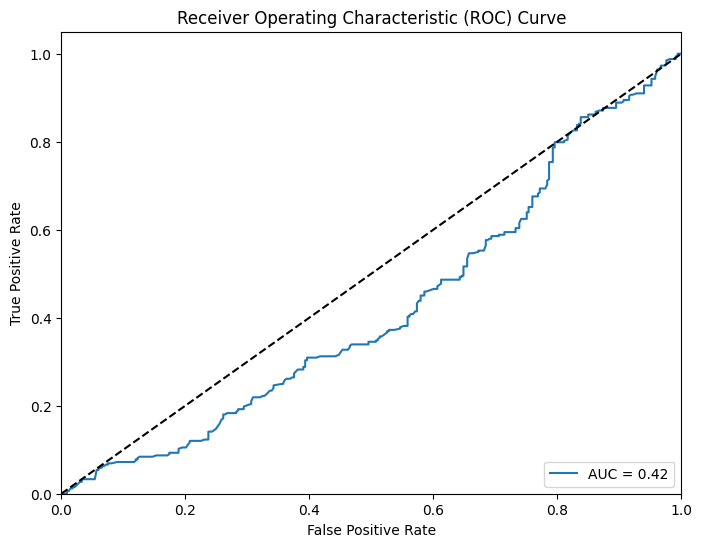

In [50]:
# Create the model with specified parameters
xg = xgb.XGBClassifier(learning_rate = 0.5, max_depth= 3, n_estimators= 300)

# Fit the model to your training data
xg.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(xg, X_test_scaled, y_test_smote)

### **5.10 LightGBM**

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       333
           1       0.76      0.63      0.69       333

    accuracy                           0.72       666
   macro avg       0.72      0.72      0.72       666
weighted avg       0.72      0.72      0.72       666

Confusion Matrix:
 [[267  66]
 [122 211]]
AUC (Area Under the Curve): 0.79


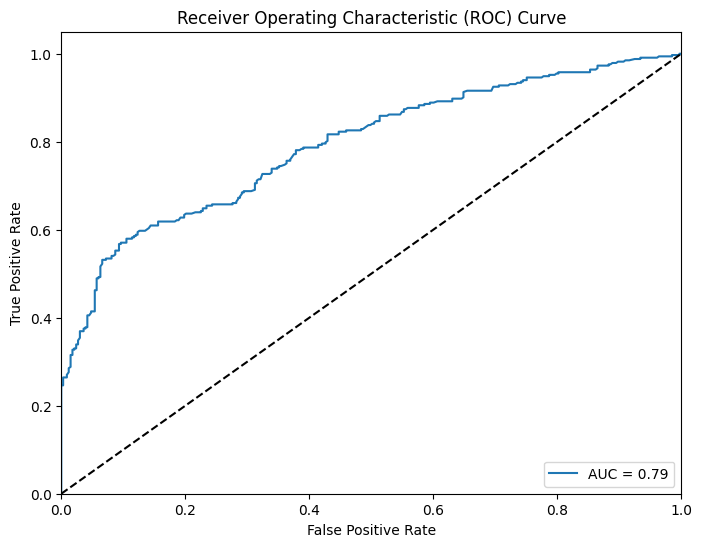

In [51]:
# Create the model with specified parameters
light = lgb.LGBMClassifier(learning_rate = 0.2, max_depth= 4, n_estimators= 200, verbose = -1, force_row_wise = True)

# Fit the model to your training data
light.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(light, X_test_scaled, y_test_smote)

### **5.11 CatBoost**

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       333
           1       0.74      0.62      0.68       333

    accuracy                           0.70       666
   macro avg       0.71      0.70      0.70       666
weighted avg       0.71      0.70      0.70       666

Confusion Matrix:
 [[262  71]
 [126 207]]
AUC (Area Under the Curve): 0.78


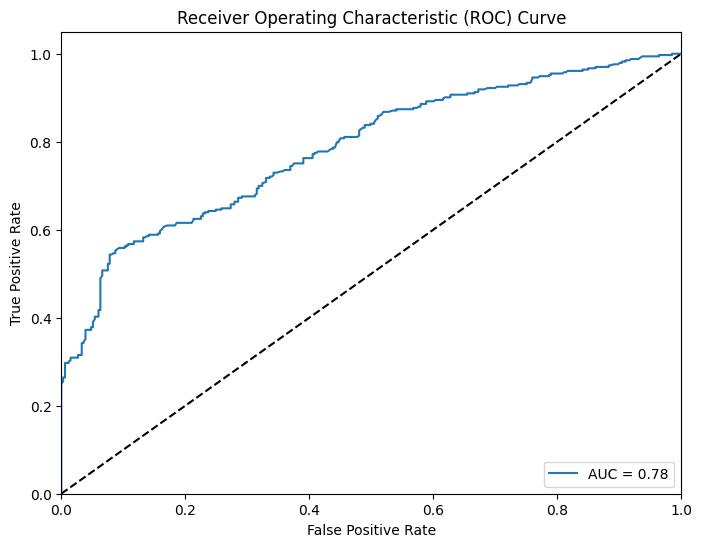

In [52]:
# Create the model with specified parameters
cat = cb.CatBoostClassifier(learning_rate = 0.2, depth= 4, iterations = 300, verbose = 0)

# Fit the model to your training data
cat.fit(X_train_scaled, y_train_smote)

# Evaluate model
evaluate_model(cat, X_test_scaled, y_test_smote)

# **6. Model Evaluation**

In [54]:
# Create a list to store the results
results = []

models = [logistic_model, svc_classifier, DT, RF, knn_classifier, ada, grb, xg, light, cat]
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'KNN', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost']

# Loop through models and collect results
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
       y_probs = model.predict_proba(X_test_scaled)[:, 1]
       auc = roc_auc_score(y_test_smote, y_probs) * 100  # Convert to percentage
    else:
        auc = 'N/A'
    accuracy = accuracy_score(y_test_smote, y_pred) * 100  # Convert to percentage

    if y_probs is not None:
        jaccard = jaccard_score(y_test_smote, y_pred) * 100  # Convert to percentage
    else:
        jaccard = 'N/A'

    results.append({
        'Model': name,
        'Accuracy': f'{accuracy:.2f}%',  # Format accuracy as percentage
        'AUC': f'{auc:.2f}%' if auc != 'N/A' else 'N/A',
        'Jaccard': f'{jaccard:.2f}%' if jaccard != 'N/A' else 'N/A'
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by AUC, accuracy, and Jaccard from high to low
sorted_results = results_df.sort_values(by=['Accuracy', 'AUC', 'Jaccard'], ascending=False)

# Display the sorted DataFrame as a table
print(sorted_results)


                 Model Accuracy     AUC Jaccard
5             AdaBoost   76.13%  81.83%  57.26%
1                  SVC   75.68%  79.90%  55.62%
6    Gradient Boosting   72.07%  78.96%  52.55%
8             LightGBM   71.77%  79.16%  52.88%
9             CatBoost   70.42%  78.46%  51.24%
4                  KNN   69.07%  72.22%  50.00%
2        Decision Tree   68.32%  71.34%  47.51%
3        Random Forest   68.17%  75.37%  47.91%
0  Logistic Regression   65.17%  70.78%  48.33%
7              XGBoost   48.05%  42.10%  41.85%
